<a href="https://colab.research.google.com/github/amitsinghh1/demand_forecasting/blob/main/demand_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import io
import requests


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install pmdarima
from pmdarima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.4 MB/s eta 0:00:00


In [4]:
url = 'https://raw.githubusercontent.com/amitsinghh1/demand_forecasting/main/SKU%20Order%20trend.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [5]:
df.tail()

,Row Labels,2000090102,2000040102,2000700102,2011850102,2004420103,2004420102,2000090104,2004420104,2004420101,...,2000280203,2000430202,2003970106,2000450202,2004010102,2000740103,2004030106,2000740203,2000740204,2000380103
23,02-04-2023,3,3,5,3,3,4,3,2,0,...,0,0,0,0,0,0,0,0,0,0
24,03-04-2023,10,1,2,5,1,3,3,1,2,...,0,0,0,0,0,0,0,0,0,0
25,04-04-2023,4,4,4,5,2,0,4,3,4,...,0,0,0,0,0,0,0,0,0,0
26,05-04-2023,9,3,7,4,1,3,3,3,2,...,0,0,0,0,0,0,0,0,0,0
27,06-04-2023,1,2,1,0,0,2,2,1,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df['Row Labels']=pd.to_datetime(df['Row Labels'],format="%d-%m-%Y")
#df.drop(['Row Labels'],axis=1,inplace=True)
df.rename(columns={"Row Labels":"date"},inplace=True)
df.insert(1,"series",np.arange(1,len(df)+1))
df.insert(2,'total_sales',[sum(df.iloc[i,2:]) for i in range(len(df))])

In [7]:
df.tail()

,date,series,total_sales,2000090102,2000040102,2000700102,2011850102,2004420103,2004420102,2000090104,...,2000280203,2000430202,2003970106,2000450202,2004010102,2000740103,2004030106,2000740203,2000740204,2000380103
23,2023-04-02,24,251,3,3,5,3,3,4,3,...,0,0,0,0,0,0,0,0,0,0
24,2023-04-03,25,248,10,1,2,5,1,3,3,...,0,0,0,0,0,0,0,0,0,0
25,2023-04-04,26,290,4,4,4,5,2,0,4,...,0,0,0,0,0,0,0,0,0,0
26,2023-04-05,27,284,9,3,7,4,1,3,3,...,0,0,0,0,0,0,0,0,0,0
27,2023-04-06,28,111,1,2,1,0,0,2,2,...,0,0,0,0,0,0,0,0,1,0


In [8]:
from statsmodels.tsa.arima.model import ARIMA

In [9]:
df_child=pd.DataFrame()
df_child['series']=df['series']

df_result=pd.DataFrame()
df_result['date']=pd.date_range(df['date'].iloc[-1], periods=7)
df_result['series']=np.arange(len(df_child)+1,len(df_child)+8)
#df_child['month']=[i.month for i in df['date']]
#df_child['Year'] = [i.year for i in df['date']]
#df_child['series'] = np.arange(1,len(df)+1)
#df_child['sales']=df['2000090102']
for i in df.iloc[:,2:].columns:
  df_child['sales']=df[i]
  x = np.array(df_child['series']).reshape(-1, 1)
  y = df_child['sales']
  model=ARIMA(df[i],order=(5,0,10))
  model=model.fit()
  start=len(df)+1
  end=len(df)+8
  pred=model.predict(start=start,end=end,typ='levels')
  df1=pd.DataFrame({'series':pred.index, 'pred':pred.values})
  df_result[i]=df1['pred']

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

In [10]:
df_result

,date,series,total_sales,2000090102,2000040102,2000700102,2011850102,2004420103,2004420102,2000090104,...,2000280203,2000430202,2003970106,2000450202,2004010102,2000740103,2004030106,2000740203,2000740204,2000380103
0,2023-04-06,29,96.837062,2.214255,4.522311,2.222405,4.266779,1.684519,0.593822,0.812597,...,0.066933,0.071941,0.071941,-0.028097,-0.004607,0.082993,0.101682,0.092062,0.013514,0.066933
1,2023-04-07,30,76.254443,2.248194,2.801315,0.365542,1.807199,2.753940,3.066919,1.743748,...,0.054368,0.068692,0.068692,-0.005825,0.048091,0.078244,0.097766,0.088152,-0.044551,0.054368
2,2023-04-08,31,68.350215,0.423573,3.758999,3.189301,1.350590,3.685674,0.948520,1.711918,...,0.042817,0.065050,0.065050,0.017826,0.036156,0.073162,0.087986,0.075663,-0.036197,0.042817
3,2023-04-09,32,105.164763,-1.087159,1.330093,-0.296399,2.498673,2.823064,2.297776,1.499671,...,0.030829,0.060982,0.060982,0.056953,0.042022,0.068047,0.068525,0.054053,-0.042231,0.030829
4,2023-04-10,33,161.879246,3.049190,3.850212,0.314119,2.060390,3.848783,1.655501,0.716942,...,0.022706,0.057224,0.057224,0.023372,0.046358,0.061628,0.057968,0.046232,-0.041583,0.022706
5,2023-04-11,34,178.330560,2.825672,2.848275,2.046541,1.277198,3.937983,3.874133,1.545129,...,0.039450,0.053628,0.053628,0.025934,0.040682,0.056023,0.051400,0.048974,-0.026129,0.039450
6,2023-04-12,35,157.108528,6.310017,3.819187,0.644150,1.981778,2.992318,0.992694,1.210308,...,0.047660,0.050169,0.050169,0.033520,0.037150,0.051554,0.047390,0.050803,-0.028252,0.047660


In [203]:
stepwise_fit=auto_arima(df['total_sales'],start_p = 0, start_q = 0,
                          max_p = 5, max_q = 5,
                          start_P = 0,
                          d = None, D = 1,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=285.274, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=286.703, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=286.266, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=283.423, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=288.048, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.353 seconds


In [142]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -140.712
Date:                Wed, 12 Apr 2023   AIC                            283.423
Time:                        21:17:22   BIC                            284.719
Sample:                             0   HQIC                           283.809
                                 - 28                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1969.6452    267.715      7.357      0.000    1444.933    2494.358
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                73.51
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               3.40   Skew:                            -2.22
Prob(H) (two-sided):                  0.08   Kurtosis:                         9.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [272]:
model=ARIMA(df['total_sales'],order=(5,0,10))
model=model.fit()
#model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            total_sales   No. Observations:                   28
Model:                ARIMA(5, 0, 10)   Log Likelihood                -141.894
Date:                Wed, 12 Apr 2023   AIC                            317.789
Time:                        22:06:14   BIC                            340.436
Sample:                             0   HQIC                           324.712
                                 - 28                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.6241     93.284      1.797      0.072     -15.208     350.456
ar.L1         -2.3157    305.711     -0.008      0.994    -601.499     596.868
ar.L2         -1.3006    406.196     -0.003      0.997    -797.431     794.830
ar.L3          1.3565      4.074      0.333      0.739      -6.629       9.342
ar.L4          2.3005    411.253      0.006      0.996    -803.740     808.342
ar.L5          0.9592    297.970      0.003      0.997    -583.051     584.969
ma.L1          3.6003    388.193      0.009      0.993    -757.243     764.444
ma.L2          5.3385    843.638      0.006      0.995   -1648.161    1658.838
ma.L3          3.8473    797.136      0.005      0.996   -1558.510    1566.205
ma.L4          0.9380    390.009      0.002      0.998    -763.466     765.342
ma.L5         -0.7372    113.209     -0.007      0.995    -222.622     221.148
ma.L6         -2.1913    192.101     -0.011      0.991    -378.703     374.320
ma.L7         -4.1651    521.196     -0.008      0.994   -1025.690    1017.360
ma.L8         -4.4698    732.302     -0.006      0.995   -1439.756    1430.816
ma.L9         -2.5453    548.632     -0.005      0.996   -1077.844    1072.754
ma.L10        -0.6154    192.025     -0.003      0.997    -376.977     375.746
sigma2      1174.1019     22.918     51.230      0.000    1129.183    1219.021
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 6.71
Prob(Q):                              0.79   Prob(JB):                         0.03
Heteroskedasticity (H):               1.79   Skew:                            -0.95
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.6e+19. Standard errors may be unstable.
"""

<Axes: xlabel='series'>

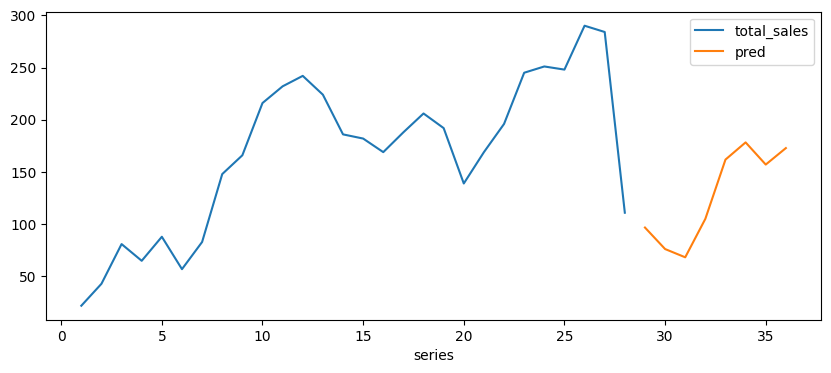

In [275]:
ax=df.plot(x='series',y="total_sales",figsize=(10,4))
df1.plot(x='series',y="pred",ax=ax)

In [112]:
df_child=pd.DataFrame()
df_child['series']=df['series']
df_child['sales']=df['total_sales']
weights = np.array([0.05, 0.1, 0.15 ,0.25, 0.45])
pred_wma = df_child['sales'].rolling(window = 5 ).apply(lambda x: np.sum(weights*x))
df_child['pred']=list(pred_wma)


<Axes: xlabel='series'>

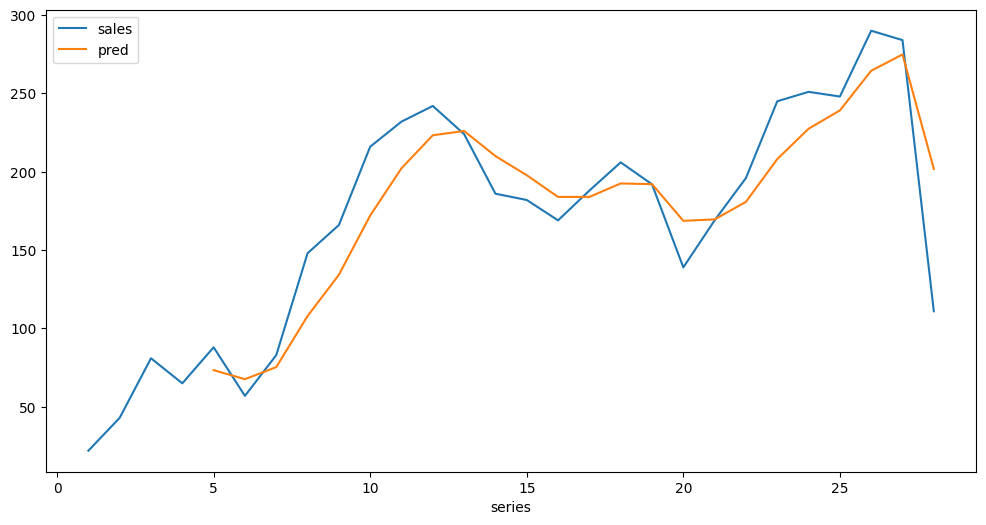

In [113]:
ax=df_child.plot(x='series',y="sales",figsize=(12,6))
df_child.plot(x='series',y="pred",ax=ax)


In [161]:
########### USING LINEAR REGRESSION MODEL ##################

#df=df.set_index('Row Labels')
from sklearn.linear_model import LinearRegression
model=LinearRegression()
df_child=pd.DataFrame()
df_child['series']=df['series']

df_result=pd.DataFrame()
df_result['date']=pd.date_range(df['date'].iloc[-1], periods=7)
df_result['series']=np.arange(len(df_child)+1,len(df_child)+8)
#df_child['month']=[i.month for i in df['date']]
#df_child['Year'] = [i.year for i in df['date']]
#df_child['series'] = np.arange(1,len(df)+1)
#df_child['sales']=df['2000090102']
for i in df.iloc[:,2:].columns:
  df_child['sales']=df[i]
  x = np.array(df_child['series']).reshape(-1, 1)
  y = df_child['sales']
  model.fit(x,y)
  test=np.array(df_result['series']).reshape(-1, 1)
  df_result[i]=model.predict(test)


In [162]:
df_result

,date,series,total_sales,2000090102,2000040102,2000700102,2011850102,2004420103,2004420102,2000090104,...,2000280203,2000430202,2003970106,2000450202,2004010102,2000740103,2004030106,2000740203,2000740204,2000380103
0,2023-04-06,29,264.730159,4.523810,1.984127,4.134921,5.484127,2.198413,2.579365,2.650794,...,0.063492,-0.015873,-0.015873,0.095238,0.079365,0.015873,0.007937,0.039683,0.142857,0.063492
1,2023-04-07,30,271.354406,4.643678,1.951013,4.257526,5.709633,2.199781,2.614395,2.703065,...,0.065408,-0.019431,-0.019431,0.099343,0.082375,0.014505,0.006021,0.039956,0.150246,0.065408
2,2023-04-08,31,277.978654,4.763547,1.917898,4.380131,5.935140,2.201149,2.649425,2.755337,...,0.067323,-0.022989,-0.022989,0.103448,0.085386,0.013136,0.004105,0.040230,0.157635,0.067323
3,2023-04-09,32,284.602901,4.883415,1.884784,4.502737,6.160646,2.202518,2.684455,2.807608,...,0.069239,-0.026546,-0.026546,0.107553,0.088396,0.011768,0.002189,0.040504,0.165025,0.069239
4,2023-04-10,33,291.227148,5.003284,1.851669,4.625342,6.386152,2.203886,2.719485,2.859880,...,0.071155,-0.030104,-0.030104,0.111658,0.091407,0.010400,0.000274,0.040777,0.172414,0.071155
5,2023-04-11,34,297.851396,5.123153,1.818555,4.747947,6.611658,2.205255,2.754516,2.912151,...,0.073071,-0.033662,-0.033662,0.115764,0.094417,0.009031,-0.001642,0.041051,0.179803,0.073071
6,2023-04-12,35,304.475643,5.243021,1.785441,4.870553,6.837165,2.206623,2.789546,2.964423,...,0.074986,-0.037219,-0.037219,0.119869,0.097427,0.007663,-0.003558,0.041325,0.187192,0.074986


<Axes: xlabel='series'>

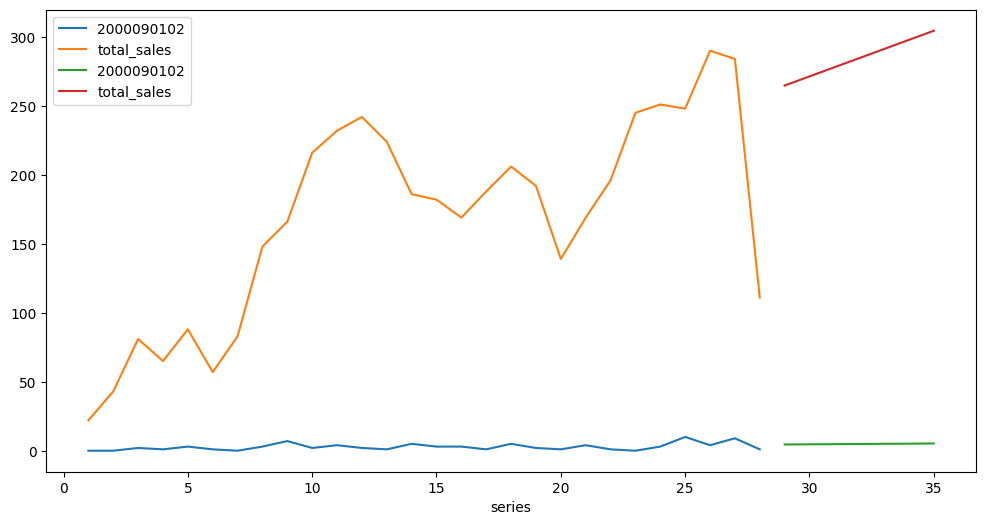

In [163]:
ax=df.plot(x='series',y="2000090102",figsize=(12,6))
df.plot(x='series',y="total_sales",ax=ax)
df_result.plot(x='series',y="2000090102",ax=ax)
df_result.plot(x='series',y="total_sales",ax=ax)